In [36]:
from IPython.display import HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation

%matplotlib inline
%load_ext autoreload

import sys
# our simulator
import battlesim as bsm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
%autoreload
import battlesim as bsm

### Trial 1. 50 Clone Troopers vs. 50 B1 battledroids

The Republic cleaned up this battle rather nicely.

In [118]:
with bsm.Battle("datasets/starwars-clonewars.csv") as b:
    trial1=[
        bsm.Army(b,"B1 battledroid",n=50).set_loc_gaussian([15., 15.], [2., 2.]),
        bsm.Army(b,"Clone Trooper",n=50).set_loc_gaussian([0., 0.], [3., 2.])
    ]
    sim = bsm.simulate_battle(trial1, max_timestep=2000)

In [119]:
HTML(bsm.quiver_fight(sim).to_jshtml())

### Trial 2. 50 Clone Troopers versus 500 B1 battledroids.

When the droids outnumber the clones 10:1, the droids seem to win every time.

Here we introduce 'grid' based formats for beginning the troops in.

In [120]:
with bsm.Battle("datasets/starwars-clonewars.csv") as b:
    trial2 = [
        bsm.Army(b,"B1 battledroid",200).set_loc_grid([6,11], [6,11], 100),
        bsm.Army(b,"Clone Trooper",50).set_loc_grid([-2,2], [-2,2], 100)
    ]
    sim2 = bsm.simulate_battle(trial2, max_timestep=2000)

In [121]:
HTML(bsm.quiver_fight(sim2).to_jshtml())

### Trial 3. Two CIS armies against 1 Republic army. Pincer movement

We also incorporate a different AI: now all units will assign the **nearest enemy** to them and move towards them.

In [265]:
with bsm.Battle("datasets/starwars-clonewars.csv") as b:
    trial3 = [
        bsm.Army(b,"B1 battledroid",120).set_loc_gaussian([10., 10.], [2., 2.]),
        bsm.Army(b,"B1 battledroid",120).set_loc_gaussian([-10., -10.], [2., 2.]),
        bsm.Army(b,"Clone Trooper",60).set_loc_gaussian([0., 0.], [4., 3.])
    ]

    sim3 = bsm.simulate_battle(trial3, max_timestep=500, 
                                ai_func=bsm.ai_nearest,
                                init_func=bsm.init_ai_nearest)

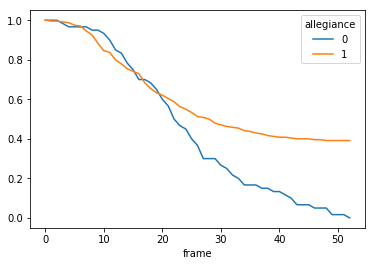

In [269]:
sim3.groupby(["frame","allegiance"]).alive.mean().unstack("allegiance").plot()

In [271]:
HTML(bsm.quiver_fight(sim3).to_jshtml())

### Trial 4: Quadrupal Pincer movement against the Republic

Here we use the AI not only for assigning nearest enemy throughout, but at the start also.

In [124]:
with bsm.Battle("datasets/starwars-clonewars.csv") as b:
    trial4 = [
        bsm.Army(b,"B1 battledroid",10).set_loc_gaussian([10., 10.], [2., 2.]),
        bsm.Army(b,"B2 battledroid",10).set_loc_gaussian([-10., -10.], [2., 2.]),
        bsm.Army(b,"B1 battledroid",10).set_loc_gaussian([10., -10.], [2., 2.]),
        bsm.Army(b,"B1 battledroid",10).set_loc_gaussian([-10., 10.], [2., 2.]),
        bsm.Army(b,"Clone Trooper",10).set_loc_gaussian([0., 0.], [3., 3.])
    ]
    sim4 = bsm.simulate_battle(trial4, max_timestep=2000, ai_func=bsm.ai_nearest, init_func=bsm.init_ai_nearest)

In [125]:
HTML(bsm.quiver_fight(sim4).to_jshtml())

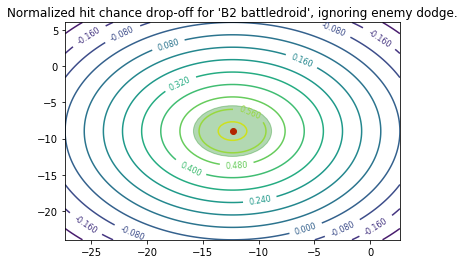

In [214]:
u = trial4[1].units_[2]
f, ax=bsm.accuracy_contour(u)

In [249]:
%autoreload
import battlesim as bsm

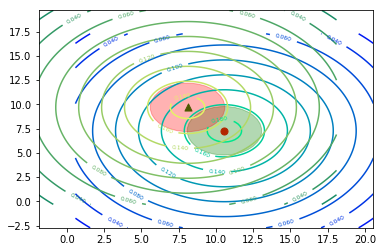

In [252]:
_=bsm.imageplot.hit_contour(trial5[0].units_[0],trial5[0].units_[2])

### Trial 5: Incorporating different units: Magmaguard

For this one, we will use the same as before (B1 battledroids and Clone Troopers), except we'll throw in some melee-unit MagmaGuards into the mix. Magmaguards have very low range, but deal high damage, don't miss and have high HP.

In [253]:
with bsm.Battle("datasets/starwars-clonewars.csv") as b:
    trial5 = [
        bsm.Army(b,"B1 battledroid",50).set_loc_gaussian([10., 10.], [2., 2.]),
        bsm.Army(b,"B2 battledroid",10).set_loc_gaussian([-10., -10.], [2., 2.]),
        bsm.Army(b,"Magmaguard", 5).set_loc_gaussian([-15., -15.], [2., 2.]),
        bsm.Army(b,"Clone Trooper",20).set_loc_gaussian([0., 0.], [3., 3.])
    ]
    sim5 = bsm.simulate_battle(trial5, max_timestep=2000, ai_func=bsm.ai_nearest, init_func=bsm.init_ai_nearest)

In [254]:
HTML(bsm.quiver_fight(sim5).to_jshtml())

### Trial 6: Selecting the weakest enemies

For this one, we will use the same as before (B1 battledroids and Clone Troopers), except Clone troopers will pick on droids with the lowest HP first.

In [257]:
with bsm.Battle("datasets/starwars-clonewars.csv") as b:
    trial6 = [
        bsm.Army(b,"B1 battledroid",50).set_loc_gaussian([10., 10.], [2., 2.]),
        bsm.Army(b,"B2 battledroid",10).set_loc_gaussian([-10., -10.], [2., 2.]),
        bsm.Army(b,"Clone Trooper",20).set_loc_gaussian([0., 0.], [3., 3.])
    ]
    sim6 = bsm.simulate_battle(trial5, max_timestep=2000, ai_func=bsm.ai.ai_weakest, init_func=bsm.init_ai_nearest)

In [258]:
HTML(bsm.quiver_fight(sim6).to_jshtml())